In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [10]:
csv = pd.read_csv("../logs/fig_1_20230203-124257.csv")
csv

,Operation,Size (MB),Ratio,Time
0,READ,512,1.000000,210.109
1,READ,512,0.666667,213.764
2,READ,1024,1.000000,200.590
3,READ,1024,0.666667,207.724
4,READ,2048,1.000000,189.712
5,READ,2048,0.666667,207.185
6,READ,3076,1.000000,185.926
7,READ,3076,0.666667,198.263
8,SCAN,512,1.000000,207.607
9,SCAN,512,0.666667,215.414


In [34]:
reads = csv[csv["Operation"] == "READ"]
reads_base = reads[reads["Ratio"] == 1]
reads_test = reads[reads["Ratio"] < 1]

# plt.plot(reads_base)

,Operation,Size (MB),Ratio,Time
1,READ,512,0.666667,213.764
3,READ,1024,0.666667,207.724
5,READ,2048,0.666667,207.185
7,READ,3076,0.666667,198.263


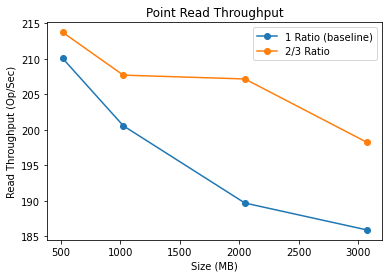

In [51]:
colname = csv.columns[1]
plt.plot(reads_base.iloc[:, 1], reads_base.iloc[:, -1], marker='o')
plt.plot(reads_test.iloc[:, 1], reads_test.iloc[:, -1], marker= 'o')
plt.title("Point Read Throughput")
plt.xlabel(colname)
plt.ylabel("Read Throughput (Op/Sec)")
plt.legend(["1 Ratio (baseline)", "2/3 Ratio"])
plt.show()

In [2]:
data2 = pd.read_csv("../logs/fig_3_20230203-100020.csv")
# data2[data2["Base Factor"] == 2]
data2

,Operation,Base Factor,Ratio,Time
0,WRITE,2,1.000000,25083.600
1,WRITE,2,0.666667,24458.500
2,WRITE,2,0.555556,24812.500
3,WRITE,4,1.000000,25537.300
4,WRITE,4,0.666667,24922.500
5,WRITE,4,0.555556,21771.500
6,WRITE,8,1.000000,24104.300
7,WRITE,8,0.666667,21025.300
8,WRITE,8,0.555556,19279.500
9,READ,2,1.000000,192.026


In [112]:
# if 'fig_3' in path:
data2["Read/Write Ratio"] = np.nan
for index, row in data2.iterrows():
    seg1 = data2[data2["Operation"] == "WRITE"]
    seg2 = seg1[seg1["Base Factor"] == row["Base Factor"]]
    seg3 = seg2[np.isclose(row["Ratio"], seg2["Ratio"])]
    data2.loc[index, "Read/Write Ratio"] = row["Time"] / seg3["Time"].iloc[0]
#     print(seg3["Time"] / row["Time"])
# data2
data2
# data2[data2["Operation"] == "READ"]
# seg1 = data2[data2["Operation"] == "WRITE"]
# seg2 = seg1[seg1["Base Factor"] == 2]
# seg2
# seg3 = seg2[np.isclose(0.666667, seg2["Ratio"])]
# seg3
# seg1 = data2[data2["Operation"] == "WRITE"]
# seg2 = seg1[seg1["Base Factor"] == row["Base Factor"]]
# seg3 = seg2[np.isclose(row["Ratio"], seg2["Ratio"])]
# seg3["Time"].iloc[0]


,Operation,Base Factor,Ratio,Time,Read/Write Ratio
0,WRITE,2,1.000000,25083.600,1.000000
1,WRITE,2,0.666667,24458.500,1.000000
2,WRITE,2,0.555556,24812.500,1.000000
3,WRITE,4,1.000000,25537.300,1.000000
4,WRITE,4,0.666667,24922.500,1.000000
5,WRITE,4,0.555556,21771.500,1.000000
6,WRITE,8,1.000000,24104.300,1.000000
7,WRITE,8,0.666667,21025.300,1.000000
8,WRITE,8,0.555556,19279.500,1.000000
9,READ,2,1.000000,192.026,0.007655


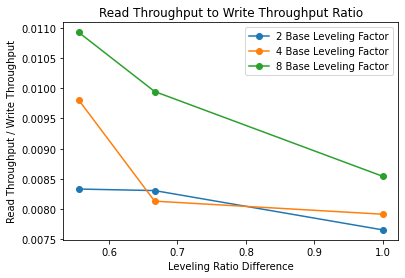

In [128]:
for base in data2["Base Factor"].unique():
    curr_data = data2[data2["Base Factor"] == base]
    curr_data = curr_data[curr_data["Operation"] == "READ"]
    plt.plot(curr_data["Ratio"], curr_data["Read/Write Ratio"], marker='o')
plt.legend([str(i) + " Base Leveling Factor" for i in data2["Base Factor"].unique()])
plt.xlabel("Leveling Ratio Difference")
plt.ylabel("Read Throughput / Write Throughput")
plt.title("Read Throughput to Write Throughput Ratio")
plt.show()
        

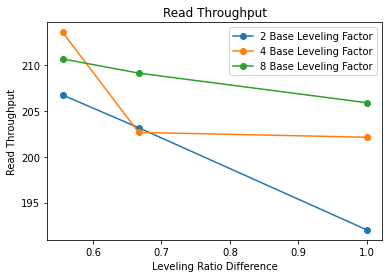

In [129]:
for base in data2["Base Factor"].unique():
    curr_data = data2[data2["Base Factor"] == base]
    curr_data = curr_data[curr_data["Operation"] == "READ"]
    plt.plot(curr_data["Ratio"], curr_data["Time"], marker='o')
plt.legend([str(i) + " Base Leveling Factor" for i in data2["Base Factor"].unique()])
plt.xlabel("Leveling Ratio Difference")
plt.ylabel("Read Throughput")
plt.title("Read Throughput")
plt.show()

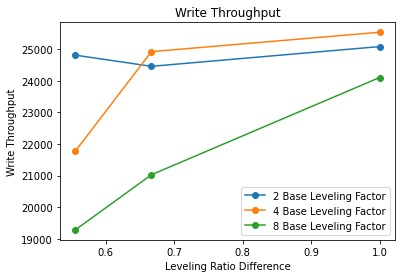

In [130]:
for base in data2["Base Factor"].unique():
    curr_data = data2[data2["Base Factor"] == base]
    curr_data = curr_data[curr_data["Operation"] == "WRITE"]
    plt.plot(curr_data["Ratio"], curr_data["Time"], marker='o')
plt.legend([str(i) + " Base Leveling Factor" for i in data2["Base Factor"].unique()])
plt.xlabel("Leveling Ratio Difference")
plt.ylabel("Write Throughput")
plt.title("Write Throughput")
plt.show()

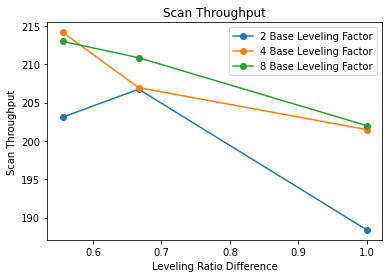

In [131]:
for base in data2["Base Factor"].unique():
    curr_data = data2[data2["Base Factor"] == base]
    curr_data = curr_data[curr_data["Operation"] == "SCAN"]
    plt.plot(curr_data["Ratio"], curr_data["Time"], marker='o')
plt.legend([str(i) + " Base Leveling Factor" for i in data2["Base Factor"].unique()])
plt.xlabel("Leveling Ratio Difference")
plt.ylabel("Scan Throughput")
plt.title("Scan Throughput")
plt.show()

In [ ]:
for base in data2["Base Factor"].unique():
    curr_data = data2[data2["Base Factor"] == base]
    curr_data = curr_data[curr_data["Operation"] == "READ"]
    plt.plot(curr_data["Ratio"], curr_data["Read/Write Ratio"], marker='o')
plt.legend([str(i) + " Base Leveling Factor" for i in data2["Base Factor"].unique()])
plt.xlabel("Leveling Ratio Difference")
plt.ylabel("Read Throughput / Write Throughput")
plt.title("Read Throughput to Write Throughput Ratio")
plt.show()


In [3]:
data2

,Operation,Base Factor,Ratio,Time
0,WRITE,2,1.000000,25083.600
1,WRITE,2,0.666667,24458.500
2,WRITE,2,0.555556,24812.500
3,WRITE,4,1.000000,25537.300
4,WRITE,4,0.666667,24922.500
5,WRITE,4,0.555556,21771.500
6,WRITE,8,1.000000,24104.300
7,WRITE,8,0.666667,21025.300
8,WRITE,8,0.555556,19279.500
9,READ,2,1.000000,192.026


In [22]:
baseline = data2[data2["Ratio"] == 1]
test = data2[np.isclose(data2["Ratio"], 0.6666667)]
test2 = data2[np.isclose(data2["Ratio"], 0.5555556)]
test2

,Operation,Base Factor,Ratio,Time
2,WRITE,2,0.555556,24812.500
5,WRITE,4,0.555556,21771.500
8,WRITE,8,0.555556,19279.500
11,READ,2,0.555556,206.735
14,READ,4,0.555556,213.574
17,READ,8,0.555556,210.667
20,SCAN,2,0.555556,203.096
23,SCAN,4,0.555556,214.176
26,SCAN,8,0.555556,212.987


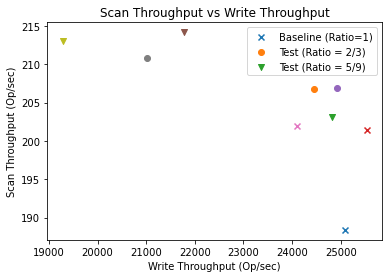

In [25]:
b_writes = baseline[baseline["Operation"] == "WRITE"]
b_scans = baseline[baseline["Operation"] == "SCAN"]
t_writes = test[test["Operation"] == "WRITE"]
t_scans = test[test["Operation"] == "SCAN"]
t_2_writes = test2[test2["Operation"] == "WRITE"]
t_2_scans = test2[test2["Operation"] == "SCAN"]
for i in [2, 4, 8]:
    curr_write = b_writes[b_writes["Base Factor"] == i]["Time"].iloc[0]
    curr_scan = b_scans[b_scans["Base Factor"] == i]["Time"].iloc[0]
    plt.scatter(curr_write, curr_scan, marker="x")
    

    curr_test_write = t_writes[t_writes["Base Factor"] == i]["Time"].iloc[0]
    curr_test_scan = t_scans[t_scans["Base Factor"] == i]["Time"].iloc[0]
    plt.scatter(curr_test_write, curr_test_scan, marker = "o")

    curr_test_2_write = t_2_writes[t_2_writes["Base Factor"] == i]["Time"].iloc[0]
    curr_test_2_scan = t_2_scans[t_2_scans["Base Factor"] == i]["Time"].iloc[0]
    plt.scatter(curr_test_2_write, curr_test_2_scan, marker = "v")
    plt.legend(["Baseline (Ratio=1)", "Test (Ratio = 2/3)", "Test (Ratio = 5/9)"])

    plt.xlabel("Write Throughput (Op/sec)")
    plt.ylabel("Scan Throughput (Op/sec)")
    plt.title("Scan Throughput vs Write Throughput")

    

    

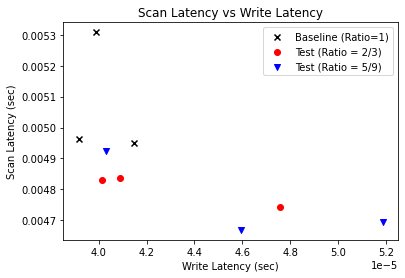

In [30]:
b_writes = baseline[baseline["Operation"] == "WRITE"]
b_scans = baseline[baseline["Operation"] == "SCAN"]
t_writes = test[test["Operation"] == "WRITE"]
t_scans = test[test["Operation"] == "SCAN"]
t_2_writes = test2[test2["Operation"] == "WRITE"]
t_2_scans = test2[test2["Operation"] == "SCAN"]
for i in [2, 4, 8]:
    curr_write = 1/b_writes[b_writes["Base Factor"] == i]["Time"].iloc[0]
    curr_scan = 1/b_scans[b_scans["Base Factor"] == i]["Time"].iloc[0]
    plt.scatter(curr_write, curr_scan, marker="x", color="black")
    

    curr_test_write = 1/t_writes[t_writes["Base Factor"] == i]["Time"].iloc[0]
    curr_test_scan = 1/t_scans[t_scans["Base Factor"] == i]["Time"].iloc[0]
    plt.scatter(curr_test_write, curr_test_scan, marker = "o", color="red")

    curr_test_2_write = 1/t_2_writes[t_2_writes["Base Factor"] == i]["Time"].iloc[0]
    curr_test_2_scan = 1/t_2_scans[t_2_scans["Base Factor"] == i]["Time"].iloc[0]
    plt.scatter(curr_test_2_write, curr_test_2_scan, marker = "v", color="blue")
    plt.legend(["Baseline (Ratio=1)", "Test (Ratio = 2/3)", "Test (Ratio = 5/9)"])

    plt.xlabel("Write Latency (sec)")
    plt.ylabel("Scan Latency (sec)")
    plt.title("Scan Latency vs Write Latency")

    

    

In [29]:
data3 = data2
data3["1/Time (Latency)"] = 1/data2["Time"]
data3

,Operation,Base Factor,Ratio,Time,1/Time (Latency)
0,WRITE,2,1.000000,25083.600,0.000040
1,WRITE,2,0.666667,24458.500,0.000041
2,WRITE,2,0.555556,24812.500,0.000040
3,WRITE,4,1.000000,25537.300,0.000039
4,WRITE,4,0.666667,24922.500,0.000040
5,WRITE,4,0.555556,21771.500,0.000046
6,WRITE,8,1.000000,24104.300,0.000041
7,WRITE,8,0.666667,21025.300,0.000048
8,WRITE,8,0.555556,19279.500,0.000052
9,READ,2,1.000000,192.026,0.005208


In [3]:
new_t = pd.read_csv("../logs/fig_3_20230221-182839_2.csv")
new_t

,Operation,Base Factor,Ratio,Time
0,WRITE,2,1.0,24607.300
1,WRITE,4,1.0,25746.400
2,WRITE,8,1.0,24418.700
3,WRITE,2,0.8,29119.100
4,WRITE,3,0.8,25952.100
5,WRITE,4,0.8,22762.300
6,READ,2,1.0,190.241
7,READ,4,1.0,200.752
8,READ,8,1.0,203.696
9,READ,2,0.8,195.819


In [4]:
baseline = new_t[new_t["Ratio"] == 1]
for factor in baseline["Base Factor"]

,Operation,Base Factor,Ratio,Time
0,WRITE,2,1.0,24607.300
1,WRITE,4,1.0,25746.400
2,WRITE,8,1.0,24418.700
6,READ,2,1.0,190.241
7,READ,4,1.0,200.752
8,READ,8,1.0,203.696
12,SCAN,2,1.0,175.005
13,SCAN,4,1.0,186.394
14,SCAN,8,1.0,199.194
